# EARTHQUAKE DATA ANALYSIS

**Introduction**

Welcome to the Earthquake Data Analysis project! This notebook provides a comprehensive analysis of earthquake data from various regions around the world. By leveraging data science techniques and tools, we aim to uncover patterns, trends, and key insights into seismic activities.

Earthquakes are natural phenomena that can cause significant damage and loss of life. Understanding the characteristics and impacts of earthquakes is crucial for improving disaster preparedness and mitigation strategies. In this notebook, we will explore a dataset containing detailed information about earthquakes, including their magnitude, location, depth, and the potential for tsunamis.

**Objectives**

1. Analyze the distribution and frequency of earthquake magnitudes.
2. Examine the geographic distribution of earthquakes.
3. Investigate the relationship between earthquake magnitude and depth.
4. Identify regions with higher seismic activity.
5. Provide data-driven insights to aid in disaster preparedness and research.

**Tools Used**

1. Python: A powerful programming language for data analysis and visualization.
2. Pandas: A library for data manipulation and analysis.
3. Matplotlib: A plotting library for creating static, interactive, and animated visualizations.
4. Seaborn: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

**Load the Data**

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [10]:
df = pd.read_csv('earthquake.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_3676\1795970559.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,2023-07-17 03:05:00,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,2023-07-16 06:48:00,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


**Exploratory Data Analysis**

In [11]:
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display the first few rows of the DataFrame
print(df.head())


         magnitude                   date_time          cdi         mmi  \
count  1000.000000                        1000  1000.000000  1000.00000   
mean      6.940150  2010-06-19 03:02:36.720000     3.605000     6.02700   
min       6.500000         1995-05-05 03:53:00     0.000000     1.00000   
25%       6.600000         2003-08-17 04:18:15     0.000000     5.00000   
50%       6.800000         2011-06-29 20:26:30     4.000000     6.00000   
75%       7.100000         2017-02-22 08:58:45     7.000000     7.00000   
max       9.100000         2023-08-16 12:47:00     9.000000    10.00000   
std       0.438148                         NaN     3.328972     1.43399   

           tsunami          sig          nst         dmin          gap  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.325000   847.915000   193.918000     1.125174    20.926290   
min       0.000000   650.000000     0.000000     0.000000     0.000000   
25%       0.000000   691.000

**Visualization**

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


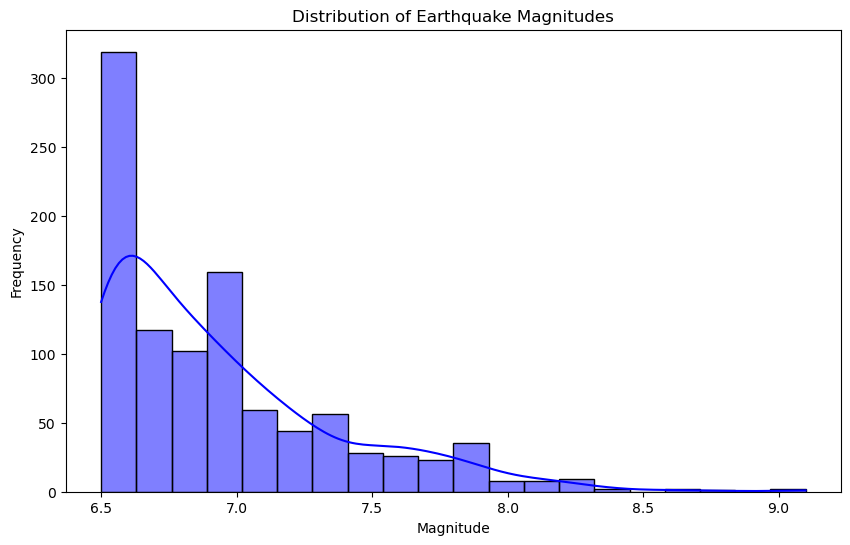

In [12]:
# Plot the distribution of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['magnitude'], bins=20, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


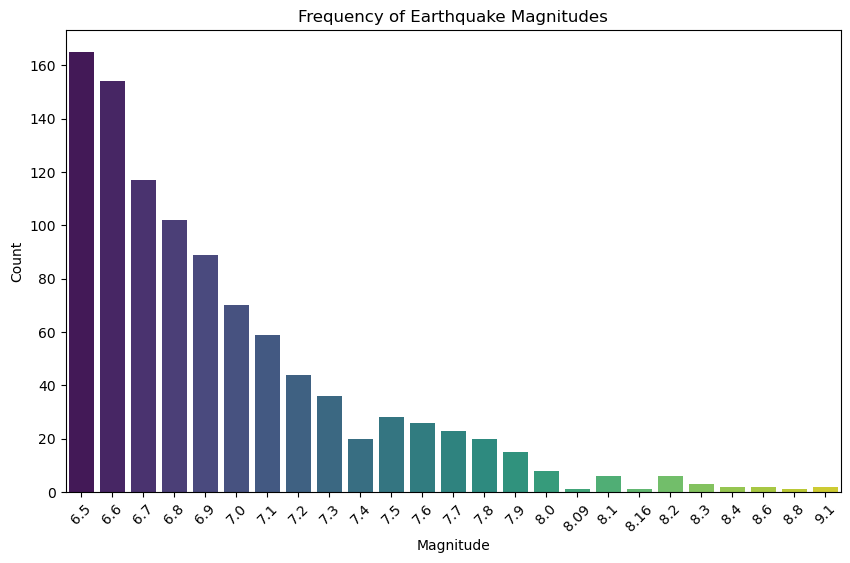

In [13]:
# Plot the count of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.countplot(x='magnitude', data=df, palette='viridis')
plt.title('Frequency of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


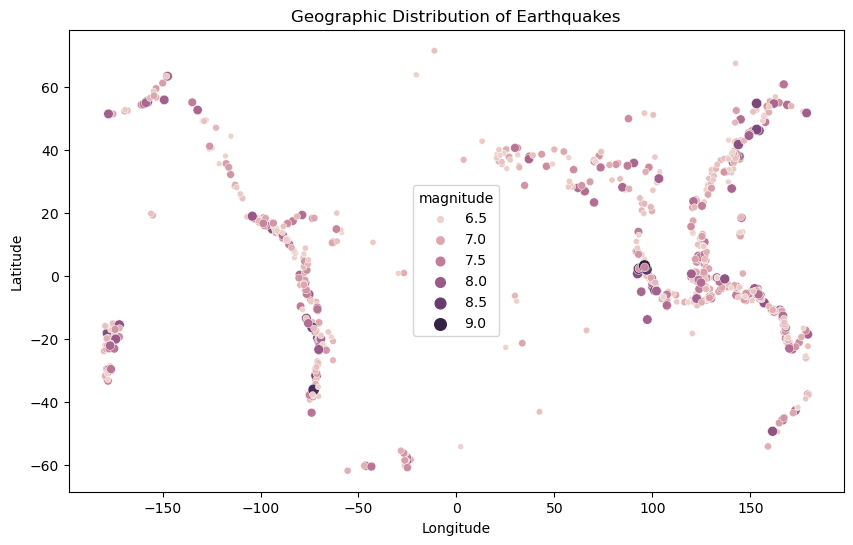

In [14]:
# Scatter plot of earthquake locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="magnitude", size="magnitude", data=df)
plt.title("Geographic Distribution of Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


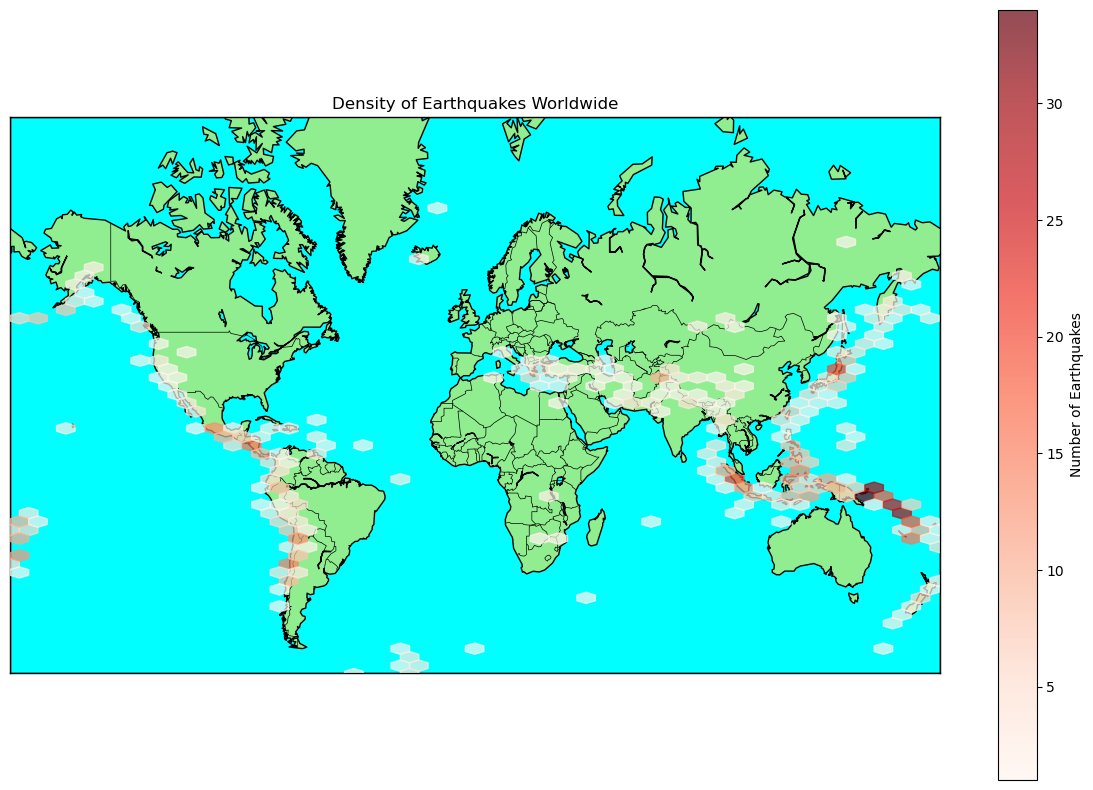

In [15]:
# Create a figure and axis with a world map
plt.figure(figsize=(15, 10))
m = Basemap(projection='merc', 
            llcrnrlat=-60, urcrnrlat=80, 
            llcrnrlon=-180, urcrnrlon=180, 
            lat_ts=20, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Convert latitude and longitude to map projection coordinates
x, y = m(df['longitude'].values, df['latitude'].values)

# Create a hexbin plot to visualize the density of earthquakes
m.hexbin(x, y, gridsize=50, cmap='Reds', mincnt=1, zorder=5, alpha=0.7)

# Add color bar and title
cb = plt.colorbar(label='Number of Earthquakes')
plt.title('Density of Earthquakes Worldwide')

# Show plot
plt.show()

         magnitude                   date_time          cdi         mmi  \
count  1000.000000                        1000  1000.000000  1000.00000   
mean      6.940150  2010-06-19 03:02:36.720000     3.605000     6.02700   
min       6.500000         1995-05-05 03:53:00     0.000000     1.00000   
25%       6.600000         2003-08-17 04:18:15     0.000000     5.00000   
50%       6.800000         2011-06-29 20:26:30     4.000000     6.00000   
75%       7.100000         2017-02-22 08:58:45     7.000000     7.00000   
max       9.100000         2023-08-16 12:47:00     9.000000    10.00000   
std       0.438148                         NaN     3.328972     1.43399   

           tsunami          sig          nst         dmin          gap  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.325000   847.915000   193.918000     1.125174    20.926290   
min       0.000000   650.000000     0.000000     0.000000     0.000000   
25%       0.000000   691.000

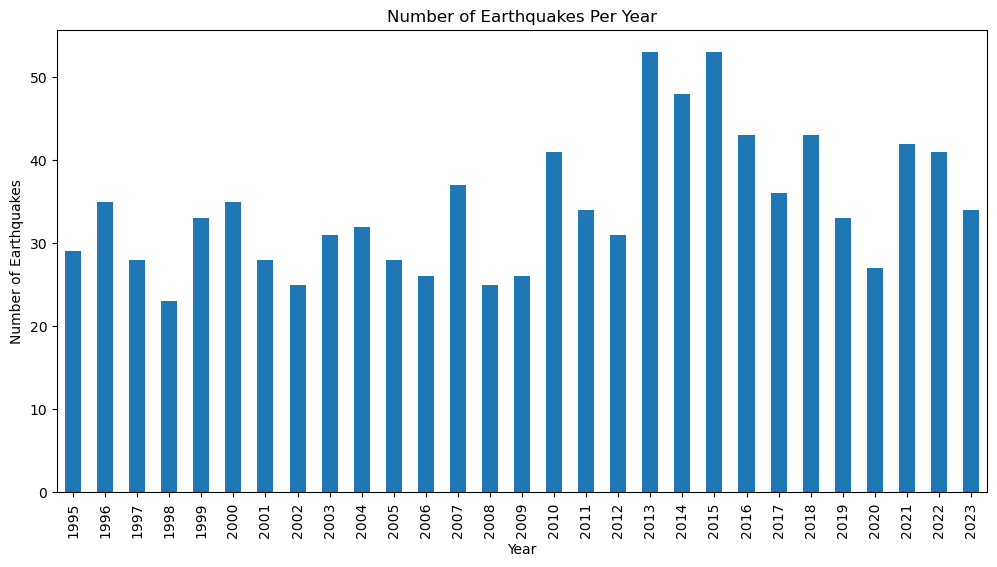

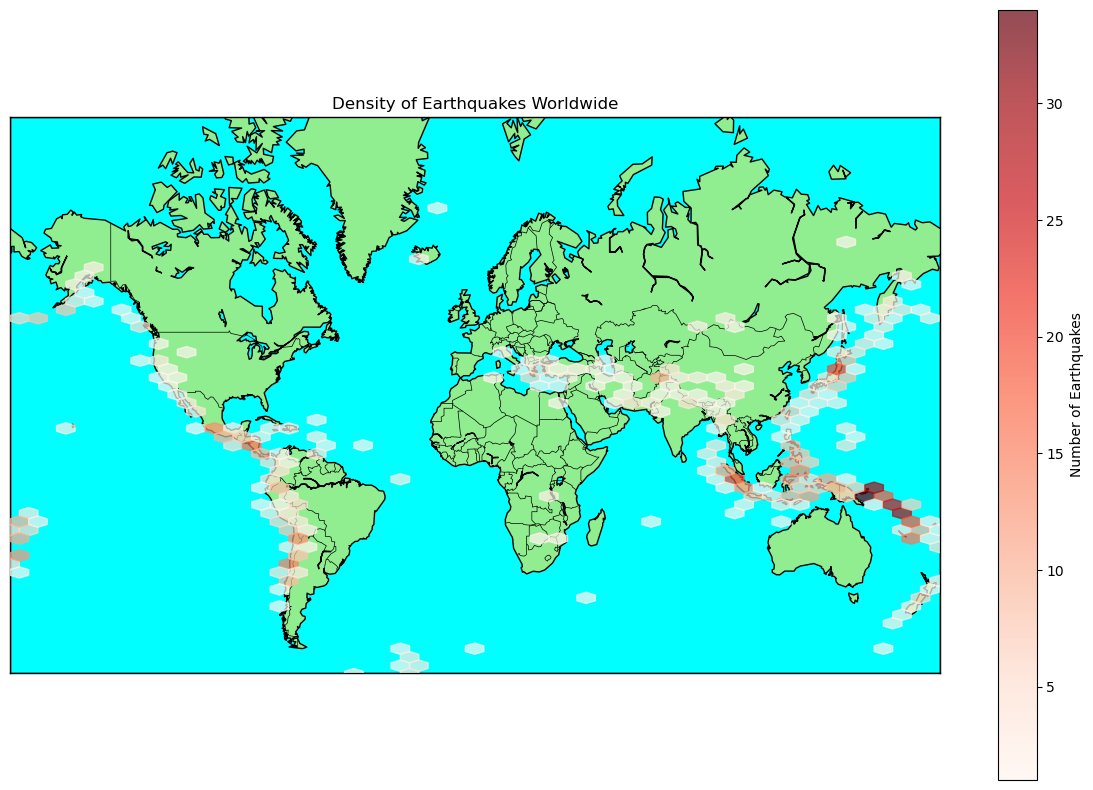

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


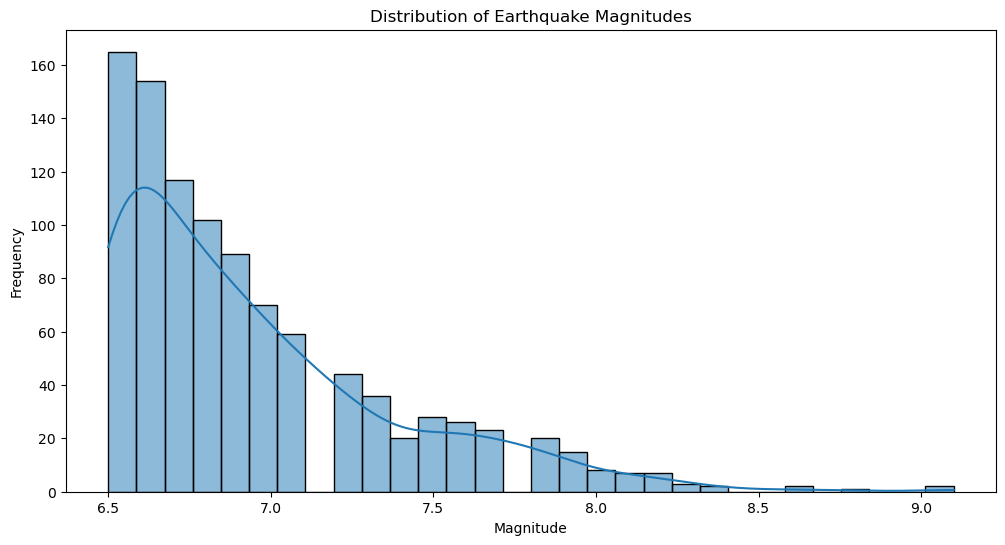

Top 10 regions with the highest seismic activity:
location
Kokopo, Papua New Guinea         29
Sola, Vanuatu                    19
Kirakira, Solomon Islands        18
Panguna, Papua New Guinea        17
Kimbe, Papua New Guinea          15
Lata, Solomon Islands            14
Tadine, New Caledonia            11
Bengkulu, Indonesia              11
South Sandwich Islands region    10
Kermadec Islands, New Zealand    10
Name: count, dtype: int64


In [18]:

# 1. Descriptive Statistics
print(df.describe())

# 2. Temporal Analysis
# Plot the number of earthquakes over time
plt.figure(figsize=(12, 6))
df['year'] = df['date_time'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Earthquakes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

# 3. Geographic Analysis
# Create a figure and axis with a world map
plt.figure(figsize=(15, 10))
m = Basemap(projection='merc', 
            llcrnrlat=-60, urcrnrlat=80, 
            llcrnrlon=-180, urcrnrlon=180, 
            lat_ts=20, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Convert latitude and longitude to map projection coordinates
x, y = m(df['longitude'].values, df['latitude'].values)

# Create a hexbin plot to visualize the density of earthquakes
m.hexbin(x, y, gridsize=50, cmap='Reds', mincnt=1, zorder=5, alpha=0.7)

# Add color bar and title
cb = plt.colorbar(label='Number of Earthquakes')
plt.title('Density of Earthquakes Worldwide')
plt.show()

# 4. Magnitude Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['magnitude'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# 5. Risk Assessment
# Identify regions with the highest seismic activity
regions = df['location'].value_counts().head(10)
print("Top 10 regions with the highest seismic activity:")
print(regions)



**Insights and Recommendations**

1. **Temporal Trends**: The number of earthquakes per year provides insights into whether seismic activity is increasing, decreasing, or stable over time. 
2. **Geographic Clusters**: Regions with higher density of earthquakes are identified, which helps in focusing disaster preparedness efforts.
3. **Magnitude Distribution**: Understanding the distribution of earthquake magnitudes can help in preparing for potential high-magnitude events.
4. **High-Risk Regions**: Identifying the top regions with the highest seismic activity can prioritize resource allocation for disaster preparedness and research.

**Recommendations**:
1. Strengthen building codes and infrastructure in high-risk regions.
2. Conduct regular earthquake drills and public awareness campaigns.
3. Invest in early warning systems and research for better prediction models.
4. Collaborate internationally for data sharing and disaster response coordination.
"""


